<a href="https://colab.research.google.com/github/jurreyyahfirdaws-mohammad/Supply-Chain-Analysis/blob/main/Supply_Chain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supply Chain Analysis**

---



---



In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
pio.renderers.default = "svg"


In [3]:
!pip install plotly==5.3.1


In [4]:
import plotly


In [5]:
pip install kaleido


In [6]:
import kaleido


In [7]:
data = pd.read_csv("/content/supply_chain_data.csv")
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [8]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [9]:
!pip install --upgrade pip


In [10]:
!pip install -U kaleido

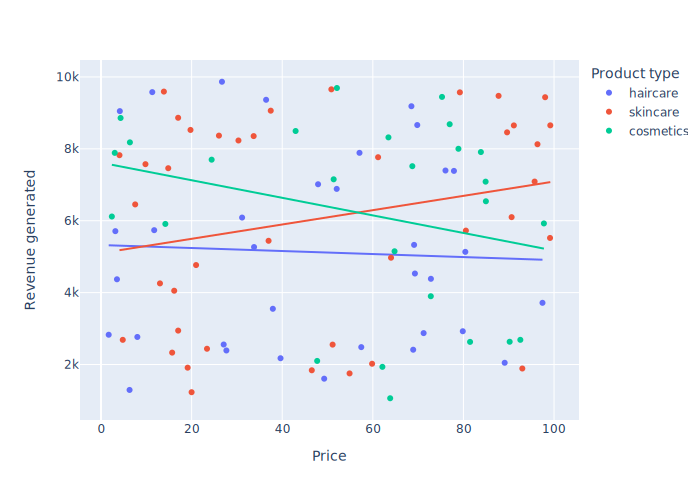

In [11]:
fig = px.scatter(data, x='Price',
                 y='Revenue generated',
                 color='Product type',
                 hover_data=['Number of products sold'],
                 trendline="ols")
fig.show("svg")

Thus, the company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate. Now let’s have a look at the sales by product type:



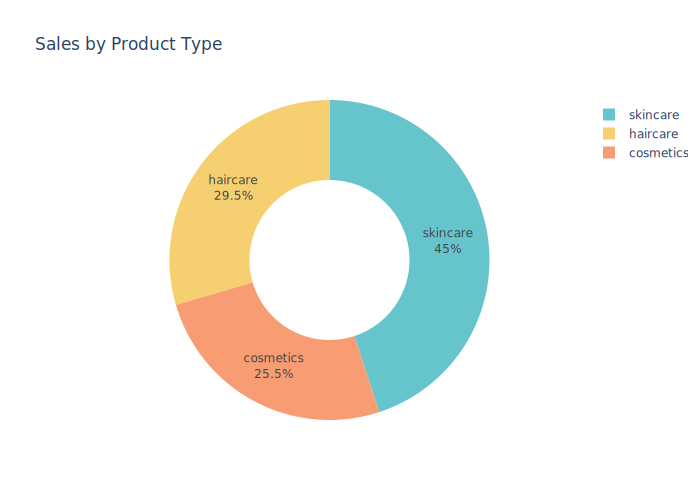

In [12]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                   title='Sales by Product Type',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show("svg")

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics. Now let’s have a look at the total revenue generated from shipping carriers:



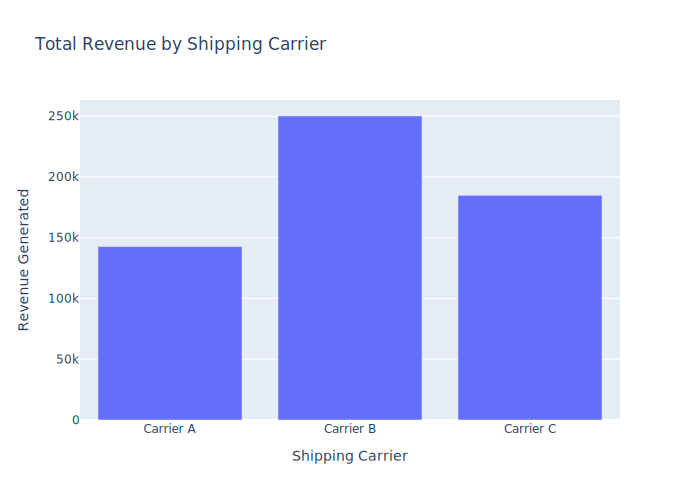

In [13]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show("svg")

So the company is using three carriers for transportation, and Carrier B helps the company in generating more revenue. Now let’s have a look at the Average lead time and Average Manufacturing Costs for all products of the company:



In [14]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


Analyzing SKUs
There’s a column in the dataset as SKUs. SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale. Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU.

Analyzing the revenue generated by each SKU:

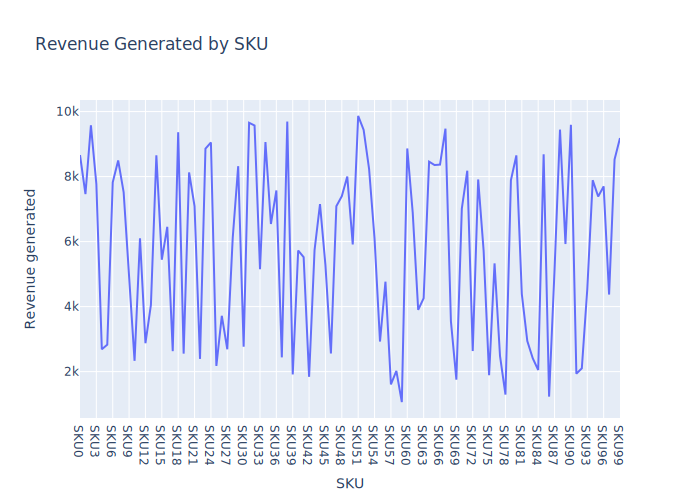

In [15]:
revenue_chart = px.line(data, x='SKU',
                        y='Revenue generated',
                        title='Revenue Generated by SKU')
revenue_chart.show("svg")

There’s another column in the dataset as Stock levels. Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU:



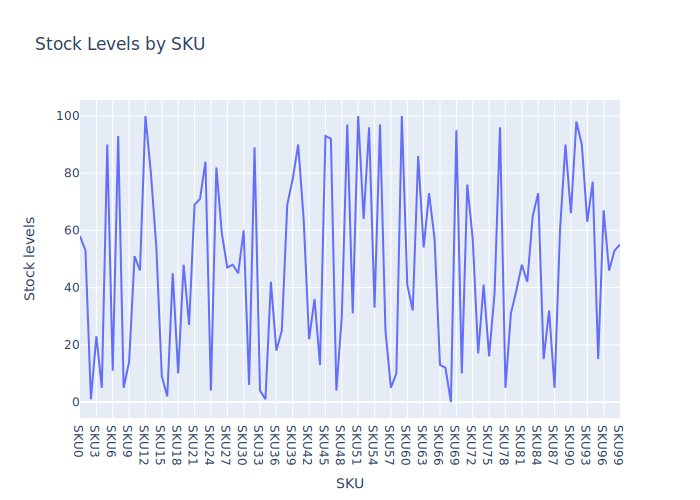

In [16]:
stock_chart = px.line(data, x='SKU',
                      y='Stock levels',
                      title='Stock Levels by SKU')
stock_chart.show("svg")

Now let’s have a look at the order quantity of each SKU:



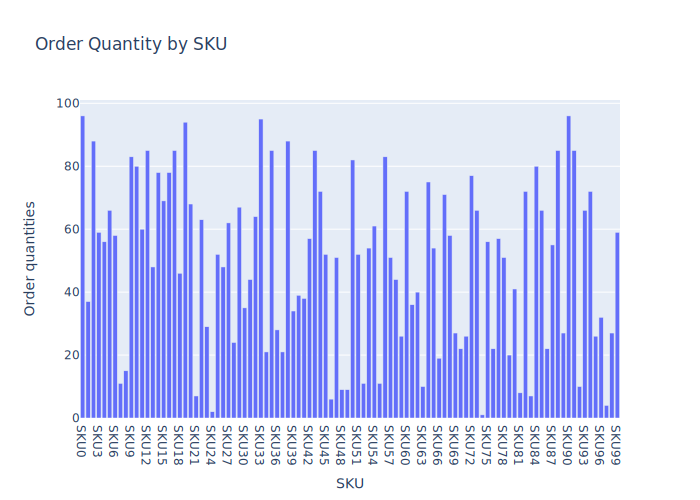

In [17]:
order_quantity_chart = px.bar(data, x='SKU',
                              y='Order quantities',
                              title='Order Quantity by SKU')
order_quantity_chart.show("svg")

## Cost Analysis
Now let’s analyze the shipping cost of Carriers:

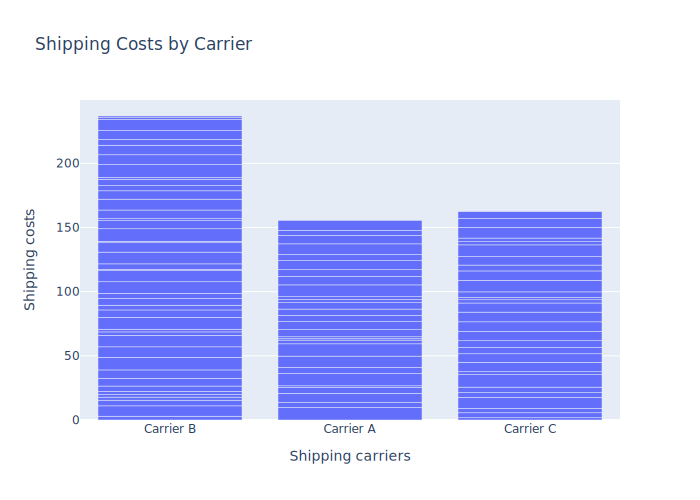

In [18]:
shipping_cost_chart = px.bar(data, x='Shipping carriers',
                             y='Shipping costs',
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show("svg")

In one of the above visualizations, we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three. Now let’s have a look at the cost distribution by transportation mode

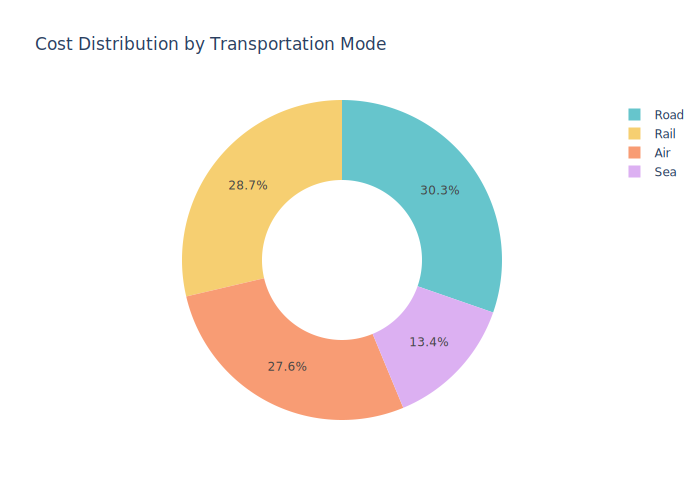

In [19]:
transportation_chart = px.pie(data,
                              values='Costs',
                              names='Transportation modes',
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show("svg")

So the company spends more on Road and Rail modes of transportation for the transportation of Goods.



## Analyzing Defect Rate
The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping. Let’s have a look at the average defect rate of all product types:

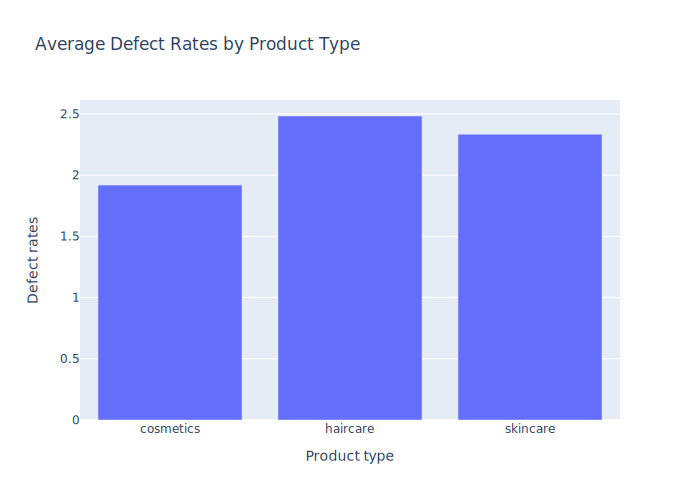

In [20]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show("svg")

So the defect rate of haircare products is higher. Now let’s have a look at the defect rates by mode of transportation:

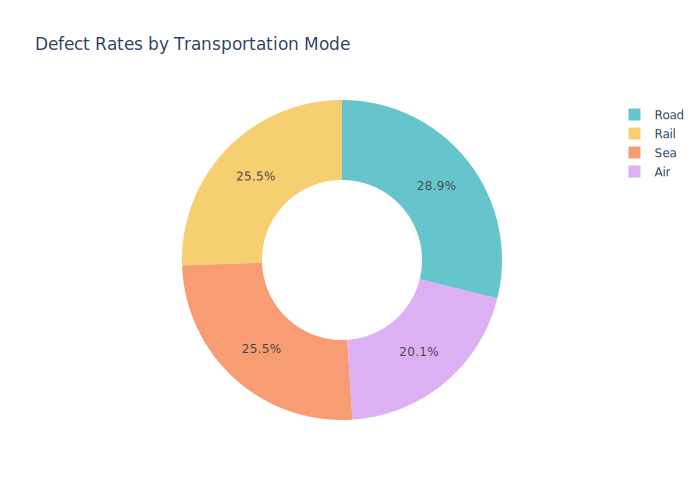

In [21]:
pivot_table = pd.pivot_table(data, values='Defect rates',
                             index=['Transportation modes'],
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"],
                              names=pivot_table.index,
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show("svg")

Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.